#Hotel Booking (Logistic Regretion)
Nama : Rahmaliyah Kadir

Nim : H071201093

#Menggunakan regresi logistik dalam dataset pemesanan hotel untuk menentukan orang-orang yang kemungkinan akan membatalkan reservasi mereka

In [1]:
# Sambung ke google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Mengimpor dan membaca data Untuk mengakses data, yang tersedia dalam CSV, dan memanipulasinya lebih jauh.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Mengimport dataset

data = pd.read_csv("/content/drive/MyDrive/Machine Learning/hotel_booking.csv")

In [4]:
# Setelah itu kita akan melakukan load data menggunakan pandas dan mencoba menampilkan sampel data untuk mendapatkan inti dari informasinya.

data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


#Penanganan data yang hilang

In [5]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
data.drop(['company', 'agent'], axis = 1, inplace = True)
data.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [7]:
data[data['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,Transient-Party,12.0,0,1,Canceled,2015-08-01,Craig Campos,CraigCampos@mail.com,820-622-9854,************7219
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,Transient-Party,12.0,0,1,Canceled,2015-08-04,David Murphy,David.Murphy94@yahoo.com,231-438-6733,************8925
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,Transient-Party,18.0,0,2,Canceled,2015-08-04,Frank Burton,Frank.Burton@comcast.net,395-084-3601,************6190
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,Transient-Party,76.5,0,1,Canceled,2015-08-09,Jerry Roberts,JRoberts@hotmail.com,979-355-3554,************5648


#Menjatuhkan baris dengan anak-anak sebagai NAN

In [8]:
#data = data.dropna( axis = 0, subset = ['children'])

data['children'][data['children'].isnull()] = data['children'].mean()

In [9]:
#Jika data sudah di load, selanjutnya lakukan pengecekan apakah ada data yang tidak 
# memiliki nilai atau NaN. Lakukan pengisian terhadap nilai kosong dengan variabel 0

data.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

#  Mengubah kategorikal menjadi angka dan menghapus kolom yang tidak berguna

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
#data_co = data.copy()
data.drop(['name', 'email', 'phone-number', 'credit_card', 'arrival_date_month', 'reservation_status_date', 'reservation_status' ], axis = 1, inplace= True)
data['market_segment'] = pd.factorize(data['market_segment'])[0] + 1
data['deposit_type'] = pd.factorize(data['deposit_type'])[0] + 1
data['assigned_room_type'] = pd.factorize(data['assigned_room_type'])[0] + 1
data['customer_type'] = pd.factorize(data['customer_type'])[0] + 1
data['distribution_channel'] = pd.factorize(data['distribution_channel'])[0] + 1
data['reserved_room_type'] = pd.factorize(data['reserved_room_type'])[0] + 1
data['meal'] = pd.factorize(data['meal'])[0] + 1
data['country'] = pd.factorize(data['country'])[0] + 1
data['hotel'] = pd.factorize(data['hotel'])[0] + 1
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,342,2015,27,1,0,0,2,0.0,...,0,1,1,3,1,0,1,0.0,0,0
1,1,0,737,2015,27,1,0,0,2,0.0,...,0,1,1,4,1,0,1,0.0,0,0
2,1,0,7,2015,27,1,0,1,1,0.0,...,0,2,1,0,1,0,1,75.0,0,0
3,1,0,13,2015,27,1,0,1,1,0.0,...,0,2,2,0,1,0,1,75.0,0,0
4,1,0,14,2015,27,1,0,2,2,0.0,...,0,2,2,0,1,0,1,98.0,0,1


#Memeriksa korelasi

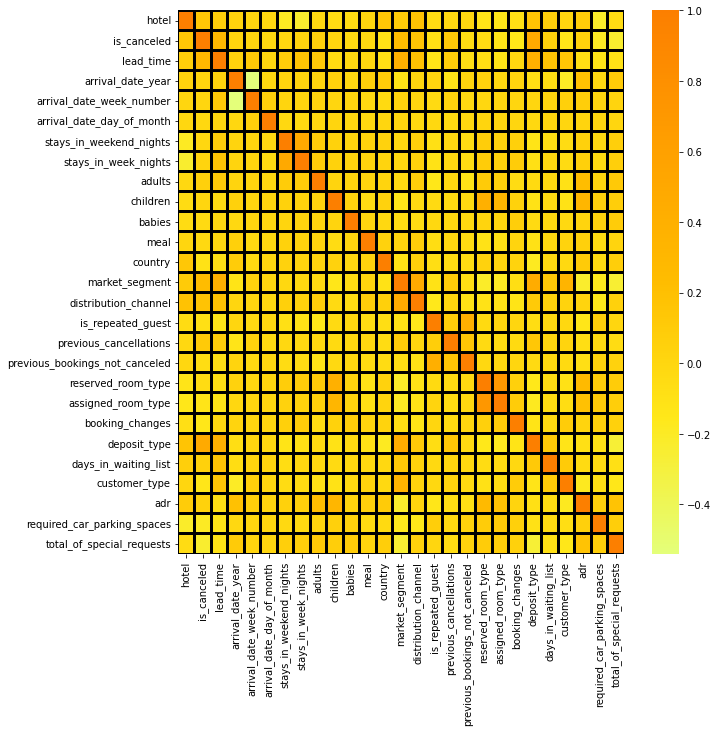

In [12]:
fig = plt.figure( figsize = ( 10,10))
data_correlations = data.corr(method = 'pearson')
sns.heatmap(data_correlations, cmap='Wistia', linecolor='black', linewidths=2)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int64  
 12  country         

# Membuat dataset train dan test

In [41]:
# Pisahkan data menjadi 10% test dan 90% train
y_all = data['is_canceled']
x_all = data.drop('is_canceled', axis = 1 , inplace = False)
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.1, random_state=101)

# Penskalaan data dan menggunakan Regresi Logistik

In [42]:
scaler_train= StandardScaler()
scaler_train.fit(x_train)
scaler_test= StandardScaler()
scaler_test.fit(x_test)
x_train_scaled = scaler_train.transform(x_train)
x_test_scaled = scaler_test.transform(x_test)

log_model= LogisticRegression()
log_model.fit(x_train_scaled, y_train)

LogisticRegression()

# Ramalan (Prediction)

In [43]:
y_pred= log_model.predict(x_test_scaled)

#  Evaluasi

In [44]:
accuracy_score(y_test, y_pred)

0.7938688332356144

In [45]:
confusion_matrix(y_test, y_pred)

array([[7076,  454],
       [2007, 2402]])

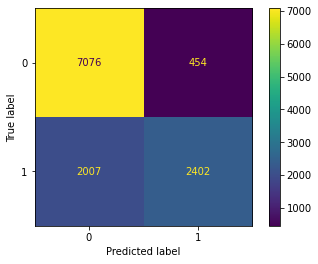

In [46]:
plot_confusion_matrix(log_model, x_test_scaled, y_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      7530
           1       0.84      0.54      0.66      4409

    accuracy                           0.79     11939
   macro avg       0.81      0.74      0.76     11939
weighted avg       0.80      0.79      0.78     11939



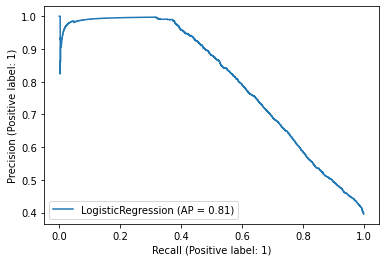

In [48]:
plot_precision_recall_curve(log_model, x_test_scaled, y_test)

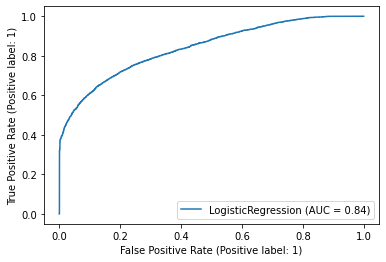

In [49]:
plot_roc_curve(log_model, x_test_scaled, y_test)